# Polynomial Interpolation â€“Â Exercise sheet 2

TMA4130/TMA4135 HÃ¸st 2023

## Lagrange interpolation

Remember how we can implement the cardinal functions and do the Lagrange interpolation:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

In [1]:
# THIS FUNCTION HAS TO BE COMPLETED CREATING THE CARDINAL FUNCTIONS
def cardinal(xdata, x):
    """
    cardinal(xdata, x): 
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x. 
    """
    n = len(xdata)              # Number of evaluation points x
    l = []
    for i in range(n):          # Loop over the cardinal functions
        li = 1
        for j in range(n):      # Loop to make the product for l_i
            if i is not j:
                li *= (x - xdata[j]) / (xdata[i] - xdata[j])
        l.append(li)            # Append the array to the list            
    return l

In [2]:
def lagrange(ydata, l):
    """
    lagrange(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by `cardinal(xdata, x)`
    Return: An array with the interpolation polynomial (evaluated at `x`). 
    """
    poly = 0                        
    for i in range(len(ydata)):
        poly = poly + ydata[i]*l[i]  
    return poly

### a) Interpolating $x(t)$

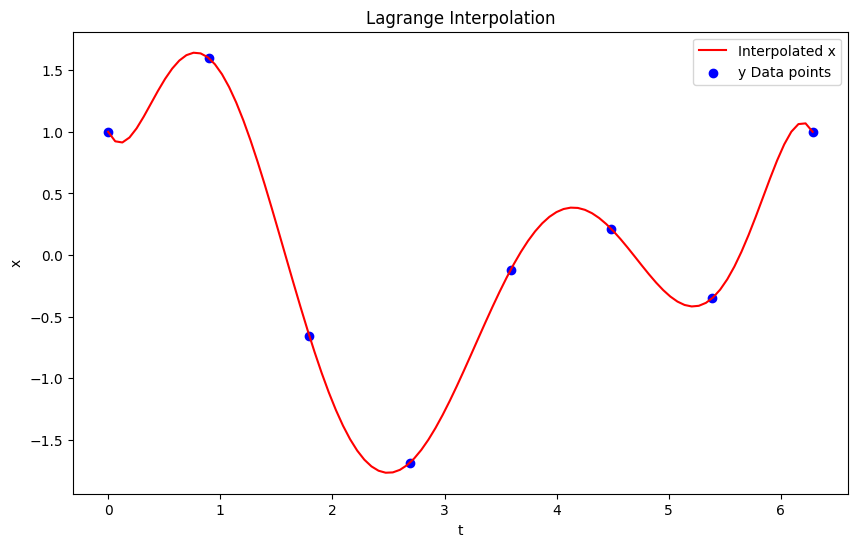

In [5]:
# Interpolation data
tdata = [0, 0.8976, 1.7952, 2.6928, 3.5904, 4.4880, 5.3856, 6.2832]
xdata = [1, 1.5984, -0.6564, -1.6828, -0.1191, 0.2114, -0.3514, 1]

    
# Grid points for plotting
t = np.linspace(0,tdata[-1],100)

# Do the interpolation for the x coordinates here
# the final polynomial should be called
l = cardinal(tdata, t)
px = lagrange(xdata,l)

# and plot it here ...
plt.figure(figsize=(10,6))
plt.plot(t, px, label='Interpolated x', color='red')
plt.scatter(tdata, xdata, color='blue', marker='o', label='y Data points')
plt.legend()
plt.title('Lagrange Interpolation')
plt.xlabel('t')
plt.ylabel('x')
plt.show()






### b) Interpolating $y(t)$

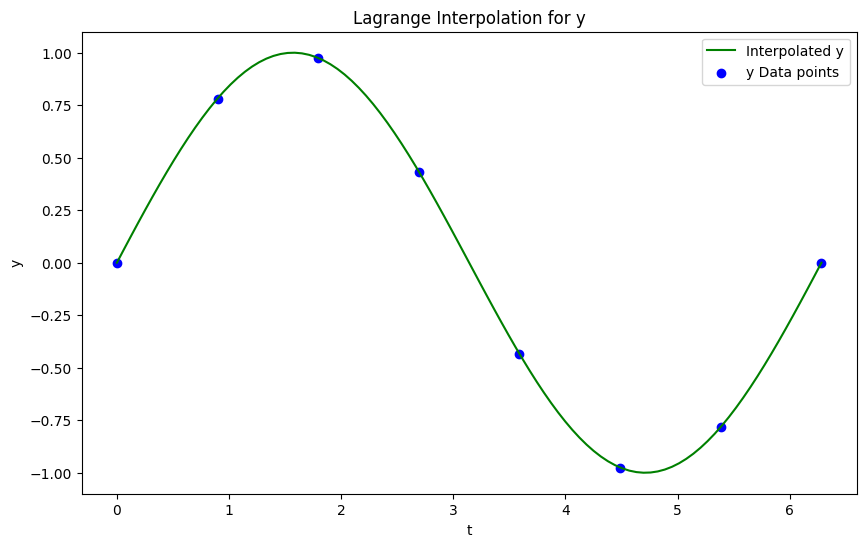

In [6]:
# Now do the same for the y coordinate...
ydata = [0, 0.7818, 0.9750, 0.4339, -0.4339, -0.975, -0.7818, 0]

# the final polynomial should be called
py = lagrange(ydata, l)

# and plot it here ...
# Plotting
plt.figure(figsize=(10,6))
plt.plot(t, py, label='Interpolated y', color='green')
plt.scatter(tdata, ydata, color='blue', marker='o', label='y Data points')
plt.legend()
plt.title('Lagrange Interpolation for y')
plt.xlabel('t')
plt.ylabel('y')
plt.show()
#Hint: you can re-use the "li" already computed, since the cardinal functions depend only on tdata, not on xdata!

### c) Trajectory

The trajectory of a particle moving in $\mathbb{R}^2$ is the locus of all $(x,y)$ points traveled by the particle. Therefore, all we have to do is plot the interpolation of $x$ against the interpolation of $y$.

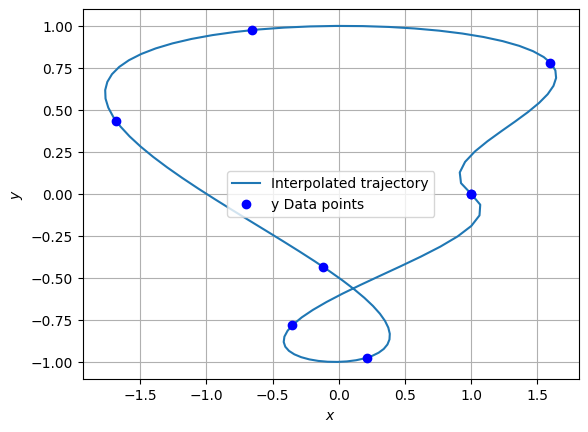

In [7]:

# If your polynomial in x is called px, Create your plot here
plt.plot(px, py, xdata, ydata,'ob')
plt.legend(['Interpolated trajectory', 'y Data points'])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)

### d) Find the exact values and compare

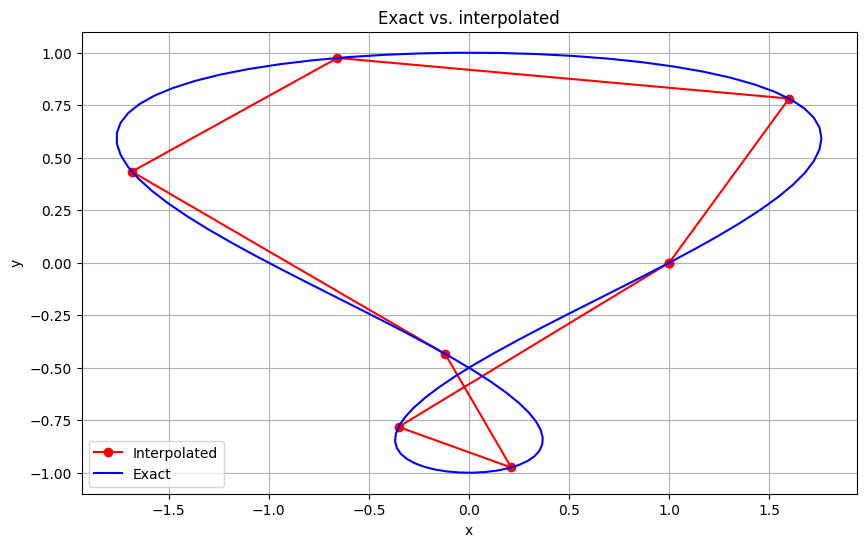

In [8]:
# Compute the exact values
def x(t):
    return np.cos(t) + np.sin(2*t)

def y(t):
    return np.sin(t)
xdata_exact = x(t)
ydata_exact = y(t)

# Plot here both trajectories
# Plot the trajectories
plt.figure(figsize=(10,6))

# Interpolated trajectory
plt.plot(xdata, ydata, label='Interpolated', color='red', marker='o')

# Exact trajectory
plt.plot(xdata_exact, ydata_exact, label='Exact', color='blue')

plt.legend()
plt.title('Exact vs. interpolated')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()